In [232]:

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns


path='result.txt'
result_df = pd.read_csv(path, sep=' - ', header=None, engine='python')
result_df.columns = ['core', 'path', 'size', 'elapsed_time']
result_df=result_df.drop(columns='path')

result_df['core'] = result_df['core'].str.replace('Core: ', '').str.replace('*','17').astype('int')
result_df['size'] = result_df['size'].str.replace('Size: ', '').str.replace(' MB', '').astype('float')
result_df['elapsed_time'] = result_df['elapsed_time'].str.replace('Elapsed time:','').str.replace(' sec', '').astype('float')
cores = result_df['core'].unique()
datasize = result_df['size'].unique()
elapsed_time = result_df['elapsed_time'].values.reshape(set(datasize).__len__(),-1)

# log_datasize
ldatasize = np.log(datasize) 
ylabel = 'log(datasize)' 

# log_elapsedtime
lelapsed_time = np.log(elapsed_time) 
zlabel = 'log(elapsed time(sec))' 

def plot_3dsurface(x,y,z, params):
    fig = plt.figure(figsize=(13,13))
    ax = plt.axes(projection='3d')
    ax.set_xlabel(params['xlabel'])
    ax.set_ylabel(params['ylabel'])
    ax.set_zlabel(params['zlabel']);
    ax.set_title(params['title']);

    X, Y = np.meshgrid(x, y)
    ax.plot_surface(X, Y, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    return plt

def plot_2dsurface(x,y, params):
    plt.figure(figsize=(12,7))
    plt.plot(x,np.transpose(y),'r',linewidth=6.0,)
    plt.xlabel(params['xlabel'])
    plt.ylabel(params['ylabel'])
    plt.title(params['title' ]);
    plt.grid(True) 
    return plt
print("Correlation between elapse time and core  :", result_df['elapsed_time'].corr(result_df['core']))
print("Correlation between elapse time and size :", result_df['elapsed_time'].corr(result_df['size']))

Correlation between elapse time and core  : -0.23025011158340397
Correlation between elapse time and size : 0.7313867886649748


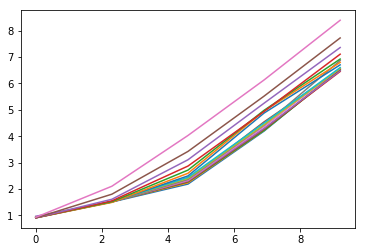

In [196]:
plt.plot(ldatasize,lelapsed_time)

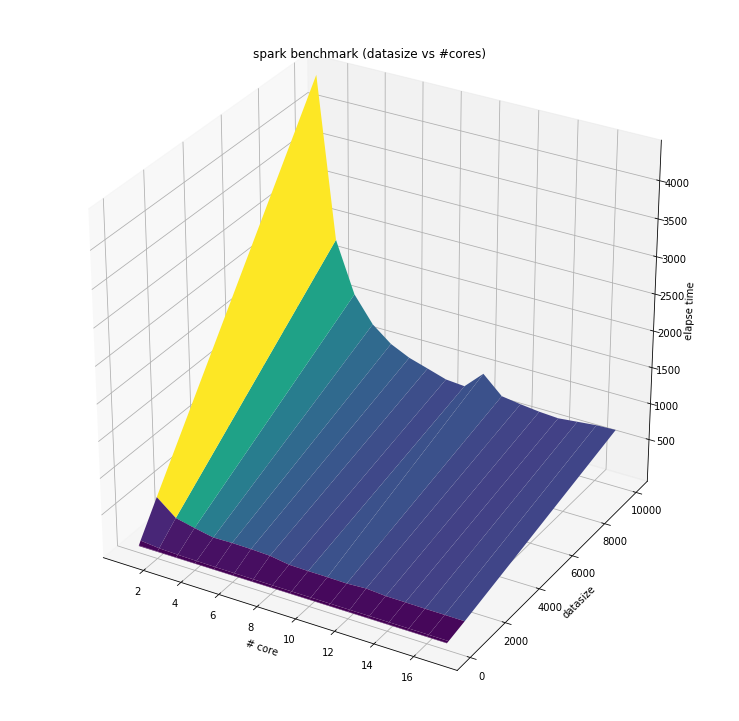

In [233]:

plot_3dsurface(x=cores, y=datasize, z=elapsed_time,
               params={'xlabel':'# core',
                       'ylabel':'datasize',
                       'zlabel':'elapse time',
                       'title':'spark benchmark (datasize vs #cores)'}).show()

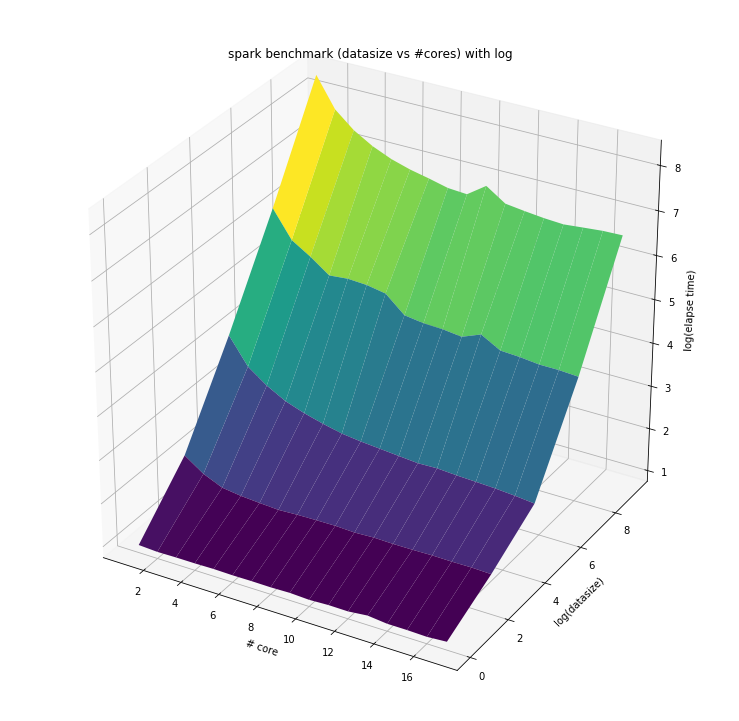

In [234]:

plot_3dsurface(x=cores, y=ldatasize, z=lelapsed_time,
               params={'xlabel':'# core',
                       'ylabel':'log(datasize)',
                       'zlabel':'log(elapse time)',
                       'title':'spark benchmark (datasize vs #cores) with log'}).show()

# speed-core benchmark for given data

## 1mb

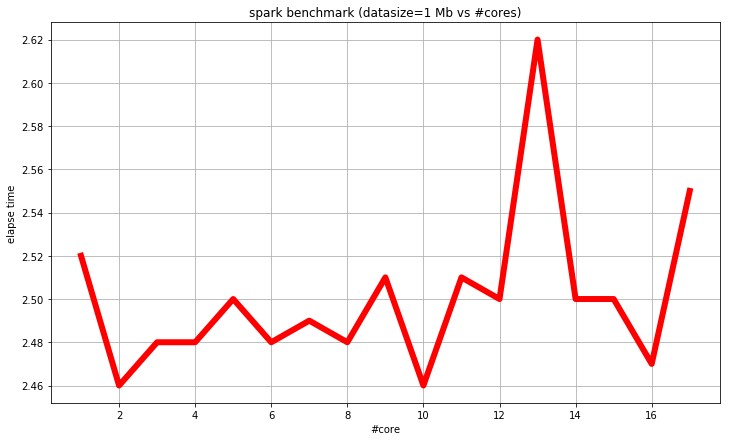

In [236]:

plot_2dsurface(cores,np.transpose(elapsed_time[0]),
               params={'title':'spark benchmark (datasize=1 Mb vs #cores)',
                       'xlabel':'#core',
                       'ylabel':'elapse time'}).show()


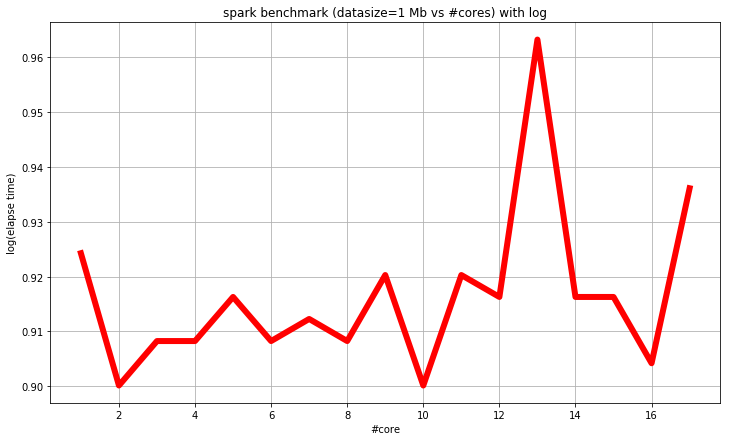

In [238]:

plot_2dsurface(cores,np.transpose(lelapsed_time[0]),
               params={'title':'spark benchmark (datasize=1 Mb vs #cores) with log',
                       'xlabel':'#core',
                       'ylabel':'log(elapse time)'}).show()


## 10 mb

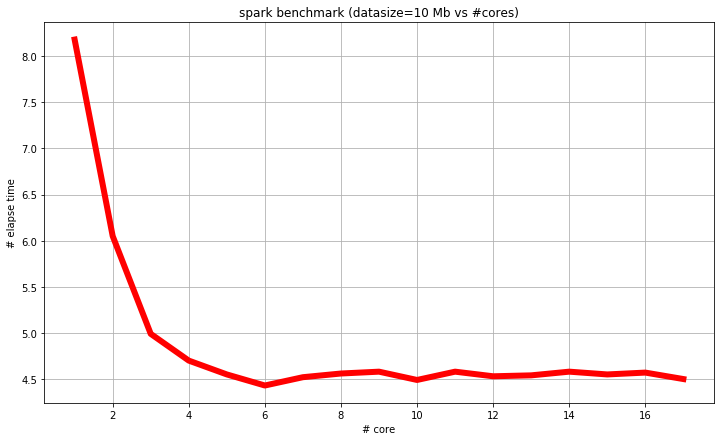

In [171]:
plot_2dsurface(y=1,title = 'spark benchmark (datasize=10 Mb vs #cores)').show()

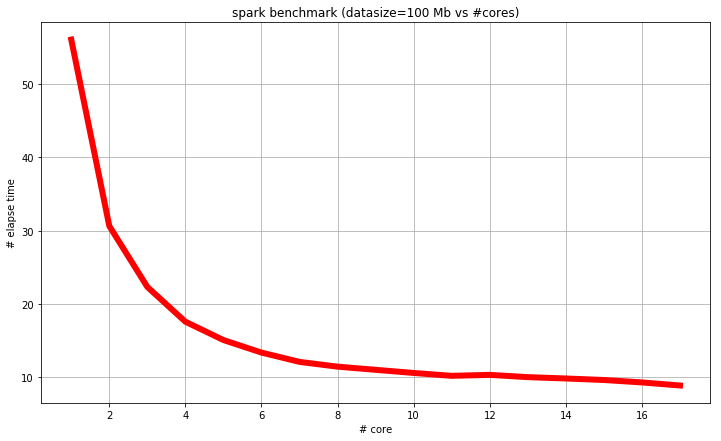

In [172]:
plot_2dsurface(y=2,title = 'spark benchmark (datasize=100 Mb vs #cores)').show()

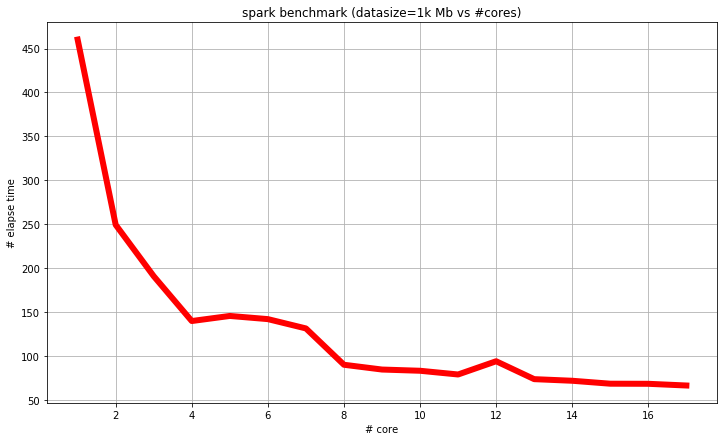

In [173]:
plot_2dsurface(y=3,title = 'spark benchmark (datasize=1k Mb vs #cores)').show()

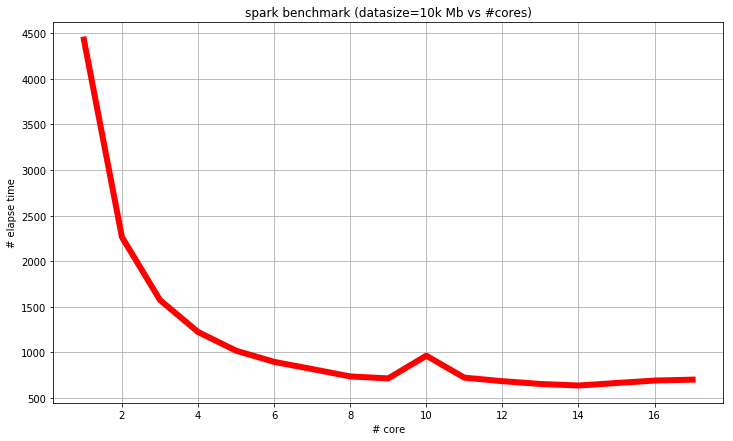

In [174]:
plot_2dsurface(y=4,title = 'spark benchmark (datasize=10k Mb vs #cores)').show()